In [4]:
import numpy as np

In [5]:
file_path_complex="/content/0.npy"


data_complex= np.load(file_path_complex)

print(data_complex)
print("Shape:", data_complex.shape)
print("Data type:", data_complex.dtype)


[[ 0.07009117 -0.04960609  0.15211301 ...  0.01362085  0.02226488
  -0.01955089]
 [ 0.08455512  0.04212813  0.07121923 ...  0.04947539 -0.09802544
  -0.04539093]
 [ 0.04964073 -0.03977876  0.01651648 ...  0.05678036 -0.06384596
   0.02936071]
 ...
 [ 0.02629841  0.04664721  0.0351219  ... -0.03130536  0.00832329
   0.05790965]
 [ 0.05766581  0.0779122   0.03818623 ...  0.0149055  -0.03707013
   0.05557628]
 [-0.03907442  0.00234751  0.07475583 ... -0.04348561  0.04877026
   0.01967677]]
Shape: (19, 500)
Data type: float64


In [6]:
file_path_electrographic="/content/10.npy"

data_electrographic= np.load(file_path_electrographic)

print(data_electrographic)
print("Shape:", data_electrographic.shape)
print("Data type:", data_electrographic.dtype)


[[ 0.02557445  0.02716136  0.02975536 ... -0.03448419 -0.03561334
  -0.03622369]
 [ 0.00039743  0.00146554  0.00427316 ... -0.02157524 -0.02371147
  -0.02551201]
 [-0.01010063 -0.009887   -0.00915458 ... -0.01950005 -0.01995781
  -0.02017143]
 ...
 [-0.00735404 -0.01882866 -0.03140191 ... -0.02377251 -0.02499321
  -0.02612237]
 [ 0.00540232  0.00219797 -0.00131156 ... -0.01467827 -0.01522758
  -0.01495292]
 [ 0.00586008  0.0027778   0.00055002 ... -0.01815727 -0.01892021
  -0.01971367]]
Shape: (19, 500)
Data type: float64


In [7]:
file_path_video="/content/183.npy"

data_video= np.load(file_path_video)

print(data_video)
print("Shape:", data_video.shape)
print("Data type:", data_video.dtype)


[[-1.48567785e-02 -2.36390386e-03  7.57361006e-03 ...  1.32521894e-02
   1.78896959e-02  2.18647015e-02]
 [-2.07997489e-03  2.17088474e-06 -2.55318984e-03 ...  1.84575539e-02
   1.09807577e-02  3.22003253e-03]
 [-8.04248324e-03 -5.20319355e-03 -3.31033375e-03 ... -1.51211695e-03
   5.70028823e-04  1.13788676e-03]
 ...
 [-3.97283468e-03 -5.67640850e-03 -6.43355241e-03 ...  7.14576281e-02
   6.86183384e-02  4.92165255e-02]
 [ 3.24647164e-02  3.87111537e-02  3.92790116e-02 ... -1.40996346e-02
  -2.11978588e-02 -1.91157130e-02]
 [ 9.08789790e-03  9.84504181e-03  5.58610728e-03 ...  1.89503068e-03
  -5.58176551e-03 -7.19069633e-03]]
Shape: (19, 500)
Data type: float64


In [8]:
file_path_normal="/content/3.npy"

data_normal= np.load(file_path_normal)

print(data_normal)
print("Shape:", data_normal.shape)
print("Data type:", data_normal.dtype)


[[-1.28103918e-03 -1.28103918e-03 -1.22000398e-03 ...  3.05875996e-04
   3.66911195e-04  2.75358396e-04]
 [ 5.50016792e-04  6.11051991e-04  5.19499192e-04 ... -2.98175984e-05
  -2.43440795e-04 -2.43440795e-04]
 [-1.15896878e-03 -1.25052158e-03 -1.61673277e-03 ...  1.52657998e-03
   1.61813277e-03  1.80123837e-03]
 ...
 [-7.32352388e-03 -8.05594626e-03 -8.75785105e-03 ...  2.50314316e-03
   2.01486157e-03  1.40450958e-03]
 [-4.88211592e-03 -5.40091511e-03 -5.82816150e-03 ...  7.53854707e-03
   7.78268787e-03  8.02682867e-03]
 [-6.56058389e-03 -7.32352388e-03 -7.81180547e-03 ...  2.50314316e-03
   2.01486157e-03  1.46554478e-03]]
Shape: (19, 500)
Data type: float64


In [1]:
!pip install PyWavelets==1.4.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 25.0 MB/s eta 0:00:00


In [10]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

def extract_wavelet_features(data, wavelet='db4', level=4):
         """Extracts Wavelet Decomposition features from EEG data.

         Args:
             data: NumPy array of EEG data with shape (channels, timepoints).
             wavelet: The type of wavelet to use (e.g., 'db4', 'sym5').
             level: The decomposition level.

         Returns:
             A list containing the approximation and detail coefficients for each channel.
         """

         num_channels = data.shape[0]
         wavelet_features = []

         for i in range(num_channels):
             channel_data = data[i]
             # Apply Wavelet Decomposition
             coeffs = pywt.wavedec(channel_data, wavelet, level=level)
             wavelet_features.append(coeffs)

         return wavelet_features
         #return [coeffs[level]]

In [11]:
complex_wavelet_features = extract_wavelet_features(data_complex)
electrographic_wavelet_features = extract_wavelet_features(data_electrographic)
video_wavelet_features = extract_wavelet_features(data_video)
normal_wavelet_features = extract_wavelet_features(data_normal)


print(complex_wavelet_features)
print(len(complex_wavelet_features))

# Accessing approximation coefficients for Channel 1:
approximation_coeffs_channel1 = complex_wavelet_features[0][0]

print("approx for channel 1=",approximation_coeffs_channel1)

# Accessing detail coefficients for Channel 1 at level 4:
detail_coeffs_channel1_level4 = complex_wavelet_features[0][1]
print("detail_lev_4 for channel 1=",detail_coeffs_channel1_level4)

detail_coeffs_channel1_level3 = complex_wavelet_features[0][2]
detail_coeffs_channel1_level2 = complex_wavelet_features[0][3]
detail_coeffs_channel1_level1 = complex_wavelet_features[0][4]





# Accessing approximation coefficients for Channel 2:
approximation_coeffs_channel2 = complex_wavelet_features[1][0]
print("approx 2=", complex_wavelet_features[1][0])

# And so on...


[[array([ 0.12711471,  0.12843053,  0.13713924,  0.12979773,  0.13253864,
        0.10867104, -0.00668636,  0.25126898,  0.17768687, -0.19571813,
       -0.12063142, -0.0729556 , -0.03030337, -0.02106455,  0.09828163,
       -0.03239771,  0.04331462, -0.1159078 , -0.1402117 , -0.03494559,
        0.04725006,  0.09809482,  0.04518553, -0.06823236, -0.07435244,
       -0.1069982 ,  0.00211471,  0.10220828,  0.10288805, -0.02931017,
        0.03968154,  0.12004536, -0.02665406, -0.02506172, -0.2481922 ,
        0.07741145, -0.02052974]), array([ 0.00419591,  0.01705076,  0.03171119,  0.05695053,  0.08151001,
        0.03688551,  0.02653899,  0.03358063,  0.03322306,  0.04272952,
       -0.02286007, -0.0265051 ,  0.03828803, -0.01502968, -0.00723899,
        0.03145335,  0.01405013, -0.03604081,  0.02194286, -0.01909772,
        0.06135236, -0.02444569, -0.07934323, -0.00295143, -0.04454059,
       -0.05543653,  0.03866255,  0.03848867, -0.03482107, -0.06071583,
       -0.02626826, -0.1055

In [12]:
import pywt
import numpy as np

def print_wavelet_coefficients(data, wavelet='db4', level=4, seizure_type=''):
    """Prints wavelet coefficients for each channel and level."""

    wavelet_features = extract_wavelet_features(data, wavelet, level)  # Assuming you have the extract_wavelet_features function

    num_channels = data.shape[0]

    for channel_index in range(num_channels):
        print(f"\nSeizure Type: {seizure_type}, Channel: {channel_index + 1}")
        coeffs = wavelet_features[channel_index]
        print(f"  Approximation Coefficients: {coeffs[0]}")
        for level_index in range(1, level + 1):
            print(f"  Detail Coefficients (Level {level_index}): {coeffs[level_index]}")

# Call the function for each seizure type:
print_wavelet_coefficients(data_complex, seizure_type='Complex Partial Seizure')
print_wavelet_coefficients(data_electrographic, seizure_type='Electrographic Seizure')
print_wavelet_coefficients(data_video, seizure_type='Video Detected Seizure')
print_wavelet_coefficients(data_normal, seizure_type='Normal EEG')

Streaming output truncated to the last 5000 lines.
  1.07847118e-03 -1.50749033e-03  8.70640870e-04 -2.97693278e-04
  1.05309751e-04 -2.02613878e-04  1.62634938e-03 -3.77706618e-03
  3.13449838e-03 -1.02036116e-04 -3.21298807e-04 -1.81884977e-03
  2.60182689e-03 -1.92208368e-03  1.27687513e-03 -1.03619205e-03
  7.86966648e-04 -3.67342666e-05 -9.58031929e-05 -1.75387489e-04
 -7.27131238e-04  1.72362585e-03 -1.50749782e-03  1.40391752e-03
 -2.37893168e-03  3.43569076e-03 -3.23272977e-03  2.47591655e-03
 -1.74730606e-03  5.13139047e-04  6.85700866e-04 -3.44334923e-04
 -5.56666790e-04  7.98988731e-04 -1.13973614e-03  1.40421473e-03
 -3.95261990e-04 -9.67033608e-04  1.99776224e-04  1.76823487e-03
 -2.36621830e-03  1.77796620e-03 -3.12825233e-04 -1.17751792e-03
  1.35858009e-03 -4.94126158e-04 -5.13022663e-04  7.17471740e-04
 -1.83097466e-04 -1.54093166e-04 -1.00445620e-04  6.72469334e-04
 -1.12651412e-03  1.45636624e-03 -1.37623866e-03  9.55251624e-04
 -6.42293542e-04  4.45169459e-04 -1.750

In [13]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

def plot_wavelet_channels(data, wavelet='db4', level=4, title='Wavelet Decomposition'):
    """Plots wavelet coefficients for all channels separately and superimposed.

    Args:
        data: NumPy array of EEG data with shape (channels, timepoints).
        wavelet: The type of wavelet to use (e.g., 'db4', 'sym5').
        level: The decomposition level to display.
        title: Title for the plots.
    """

    num_channels = data.shape[0]
    #timepoints = np.arange(data.shape[1])  # Original timepoints - REMOVED

    # Individual channel plots
    fig, axes = plt.subplots(num_channels, 1, figsize=(10, 2 * num_channels), sharex=True)
    fig.suptitle(title, fontsize=16)

    for i in range(num_channels):
        channel_data = data[i]
        coeffs = pywt.wavedec(channel_data, wavelet, level=level)

        # Create timepoints for wavelet coefficients - ADDED
        wavelet_timepoints = np.arange(len(coeffs[0]))

        axes[i].plot(wavelet_timepoints, coeffs[0])  # Plot level 4 detail coefficients
        axes[i].set_ylabel(f'Channel {i + 1}')

    plt.xlabel('Time')
    plt.show()

    # Superimposed plot
    plt.figure(figsize=(10, 5))
    for i in range(num_channels):
        channel_data = data[i]
        coeffs = pywt.wavedec(channel_data, wavelet, level=level)

        # Create timepoints for wavelet coefficients - ADDED
        wavelet_timepoints = np.arange(len(coeffs[0]))

        plt.plot(wavelet_timepoints, coeffs[0], label=f'Channel {i + 1}')

    print("Shape of data:", data_complex.shape)
    print("Shape of wavelet coefficients:", coeffs[0].shape)

    plt.title(title + ' (Superimposed)')
    plt.xlabel('Time')
    plt.ylabel('Wavelet Coefficient')
    plt.legend(loc='upper right', fontsize='small')
    plt.show()

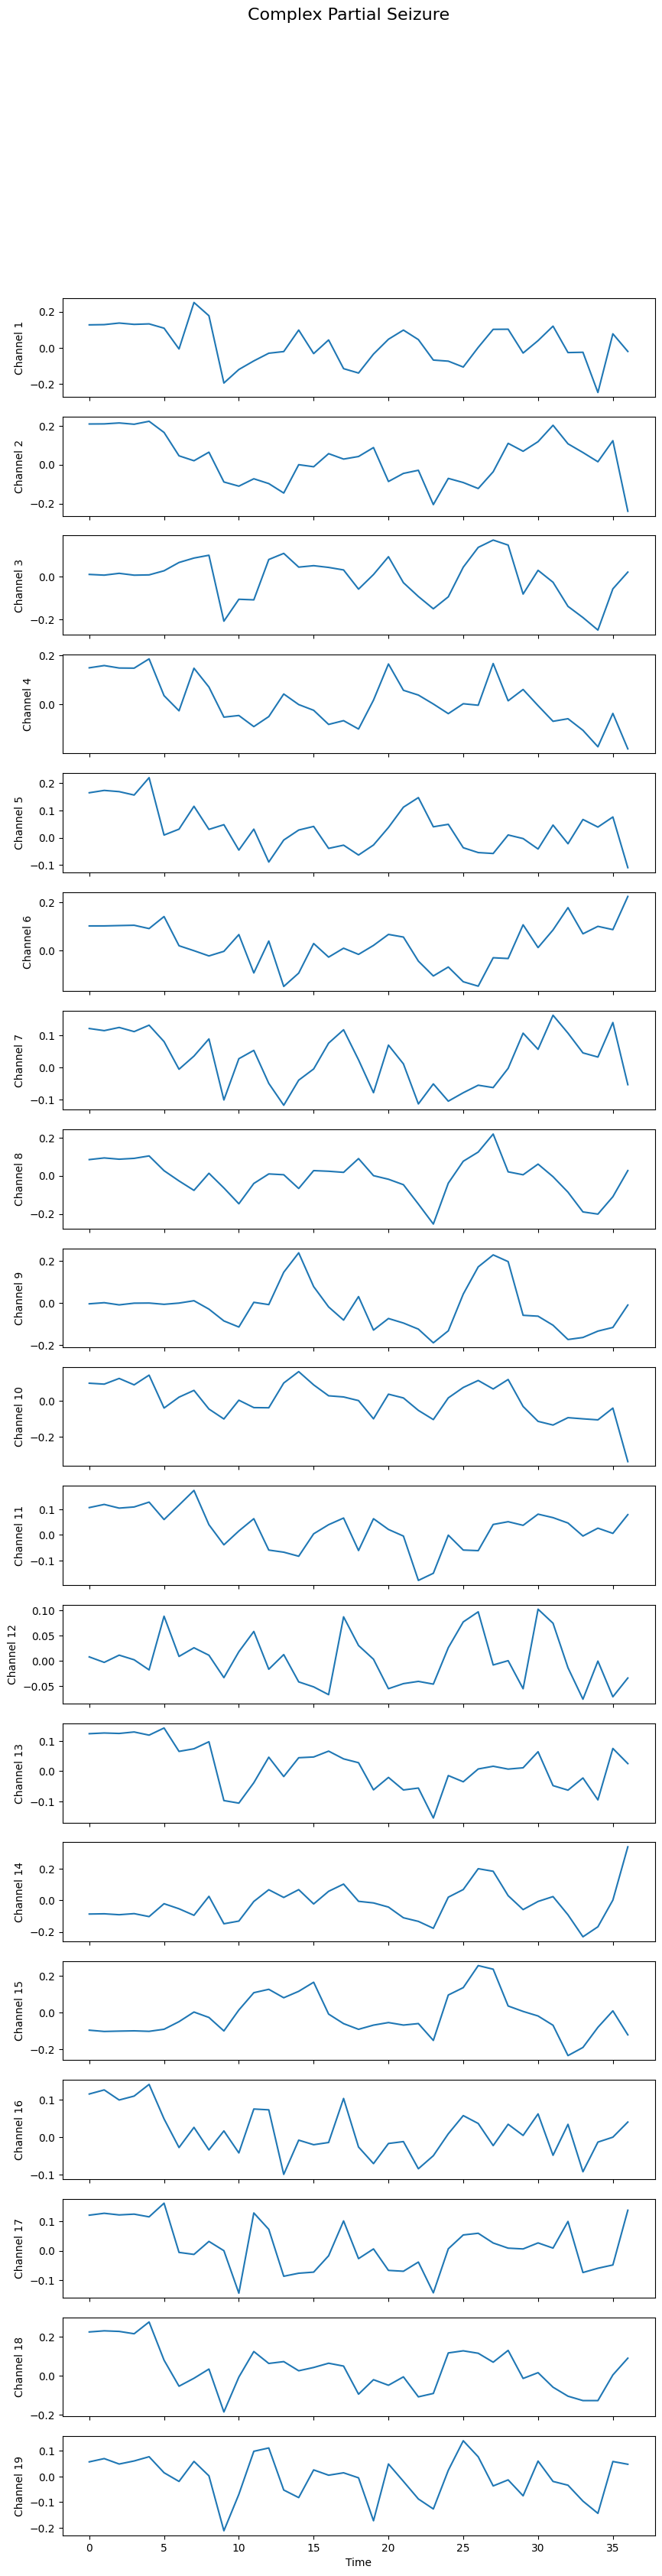

Shape of data: (19, 500)
Shape of wavelet coefficients: (37,)


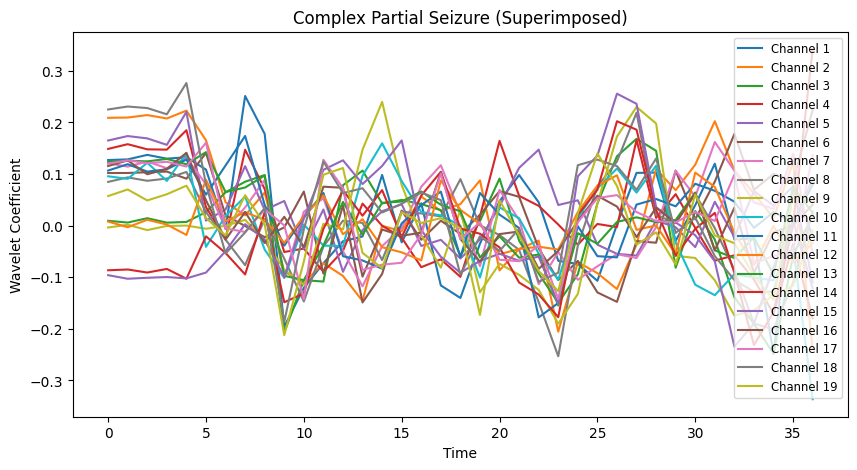

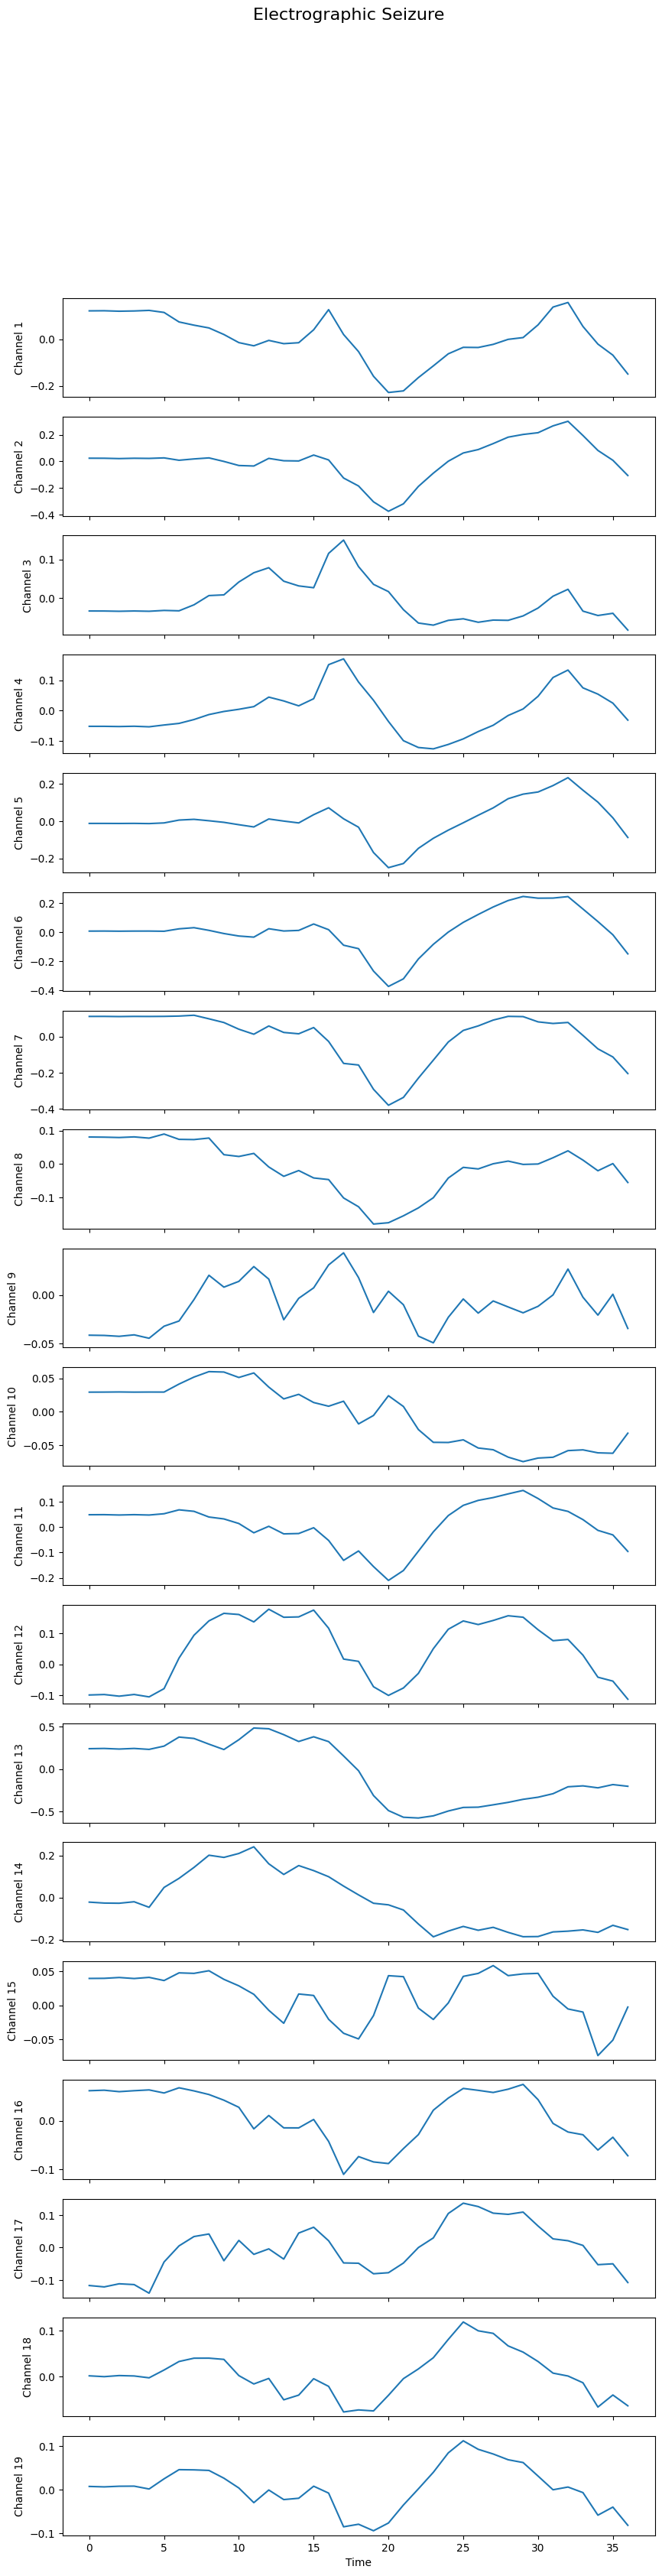

Shape of data: (19, 500)
Shape of wavelet coefficients: (37,)


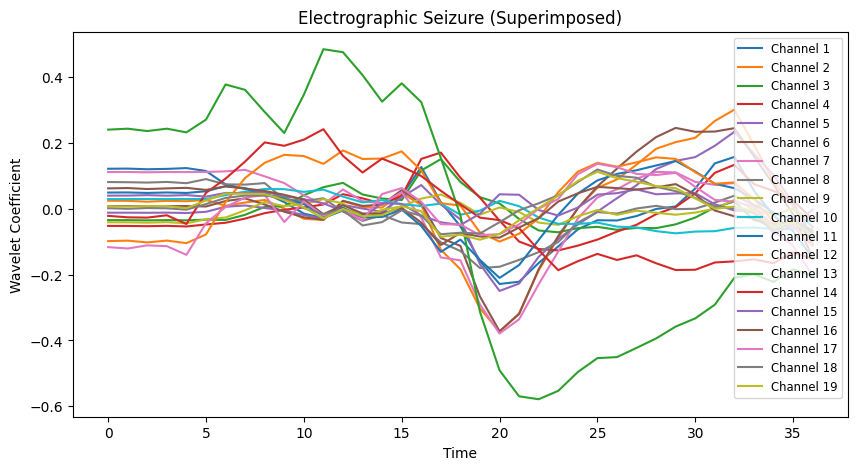

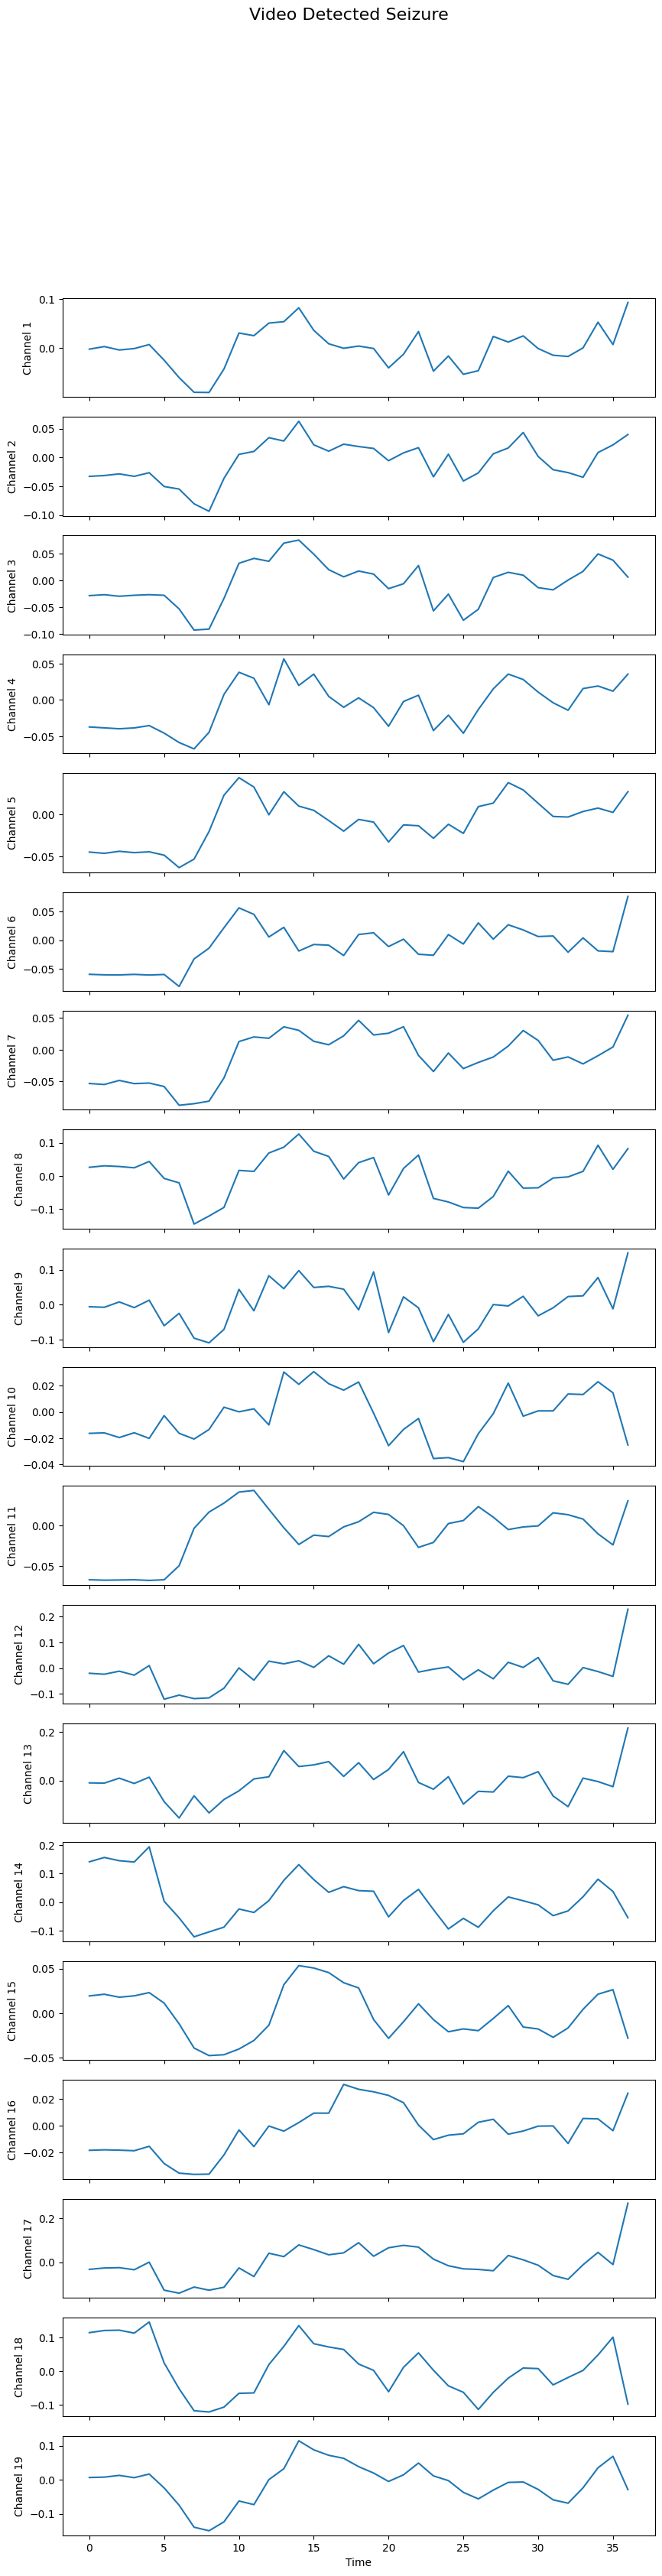

Shape of data: (19, 500)
Shape of wavelet coefficients: (37,)


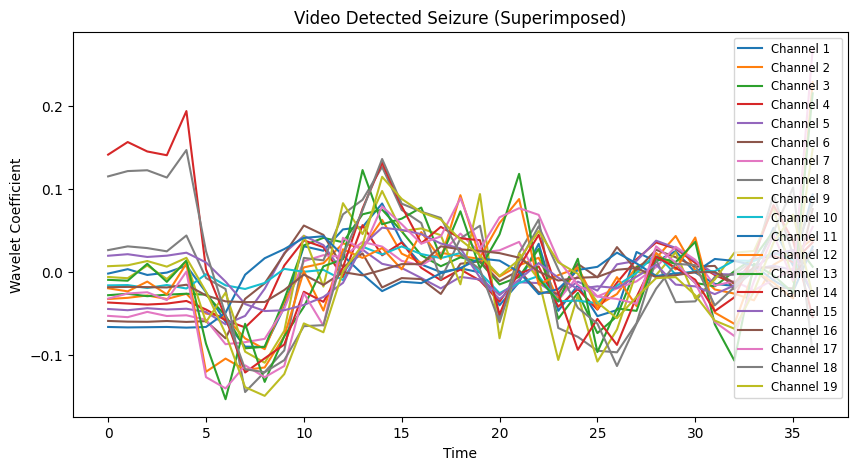

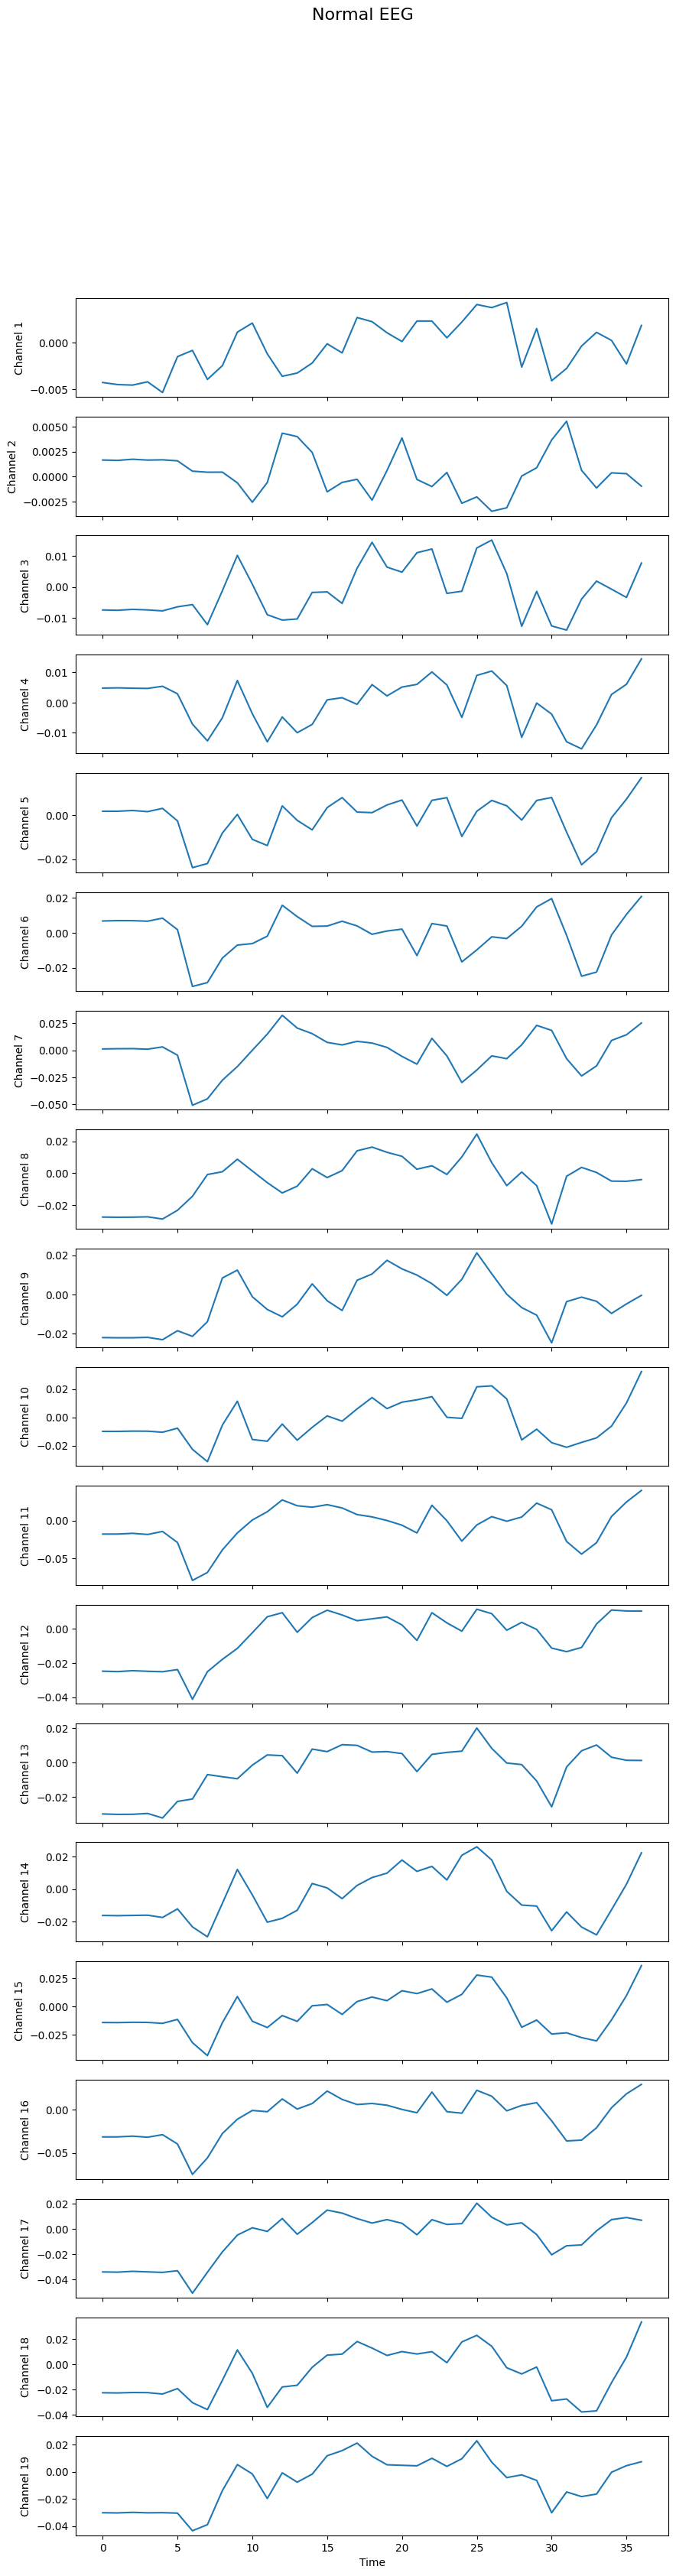

Shape of data: (19, 500)
Shape of wavelet coefficients: (37,)


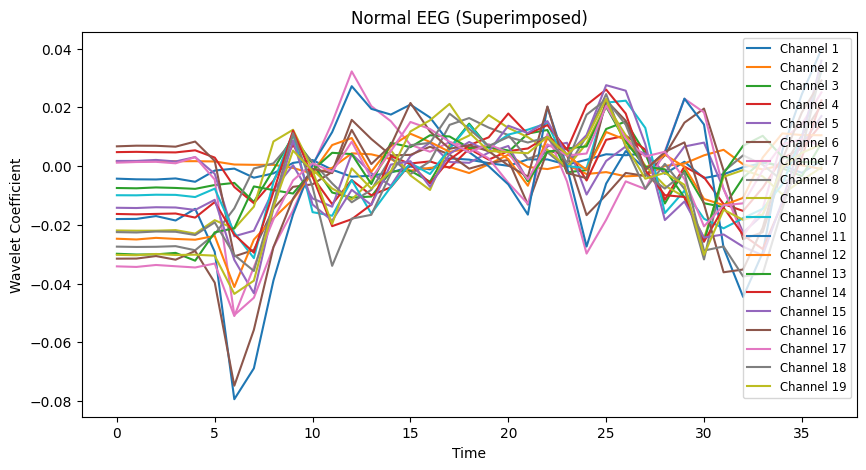

In [14]:
plot_wavelet_channels(data_complex, title='Complex Partial Seizure')
plot_wavelet_channels(data_electrographic, title='Electrographic Seizure')
plot_wavelet_channels(data_video, title='Video Detected Seizure')
plot_wavelet_channels(data_normal, title='Normal EEG')

In [15]:
import numpy as np

# Assuming 'data_complex' is your original signal for the complex seizure
original_signal_channel1 = data_complex[0]  # Original signal for Channel 1

# Adjust the length of original_signal_channel1 to match approximation_coeffs_channel1:
original_signal_channel1_approx = original_signal_channel1[:len(approximation_coeffs_channel1)]
original_signal_channel1_4 = original_signal_channel1[:len(detail_coeffs_channel1_level4)]
original_signal_channel1_3 = original_signal_channel1[:len(detail_coeffs_channel1_level3)]
original_signal_channel1_2 = original_signal_channel1[:len(detail_coeffs_channel1_level2)]
original_signal_channel1_1 = original_signal_channel1[:len(detail_coeffs_channel1_level1)]



# Calculate correlation with approximation coefficients:
correlation_approximation = np.corrcoef(original_signal_channel1_approx, approximation_coeffs_channel1)[0, 1]

# Calculate correlation with detail coefficients at level 4:
correlation_detail_level4 = np.corrcoef(original_signal_channel1_4, detail_coeffs_channel1_level4)[0, 1]
correlation_detail_level3 = np.corrcoef(original_signal_channel1_3, detail_coeffs_channel1_level3)[0, 1]
correlation_detail_level2 = np.corrcoef(original_signal_channel1_2, detail_coeffs_channel1_level2)[0, 1]
correlation_detail_level1 = np.corrcoef(original_signal_channel1_1, detail_coeffs_channel1_level1)[0, 1]



# Compare correlations to determine similarity.

print(correlation_approximation)
print(correlation_detail_level4)
print(correlation_detail_level3)
print(correlation_detail_level2)
print(correlation_detail_level1)


0.08647786348845711
-0.006480669513969326
0.1785622596959652
-0.01208043761095487
0.0005037212849051068


Therefore, correlation of level three is best so for the 0th channel of data_complex, level 3 coefficient is most similar to the original signal


In [16]:
import pandas as pd
df = pd.DataFrame(complex_wavelet_features)
df.to_csv("/content/complex_wavelhhhhet_features.csv", index=False)

In [17]:
df


,0,1,2,3,4
0,"[0.1271147063817585, 0.1284305275483233, 0.137...","[0.004195911599654954, 0.01705076258295478, 0....","[-0.023649215546862595, -0.07420570199339312, ...","[-0.00788087770642821, -0.030564601406644527, ...","[0.05070717546331012, 0.1327021022036665, -0.1..."
1,"[0.2089778024848035, 0.20951931593410433, 0.21...","[0.0004321297403898192, 0.004829313136225304, ...","[-0.01588267102843753, -0.04983713484170679, 0...","[0.006948002538074512, 0.01893625452011881, -0...","[0.009211356770392063, 0.027473869100770064, -..."
2,"[0.009335610241901882, 0.005961554765963554, 0...","[-0.0005039987188817025, 0.0009200456176801751...","[-0.007564021792671871, -0.025207415650138995,...","[0.017913136816122364, 0.05552922897567324, -0...","[0.016697005373797435, 0.047915852864166525, -..."
3,"[0.14871637245346972, 0.1578696895210293, 0.14...","[-0.001640904368152436, -0.003856046052044585,...","[0.008896452542414264, 0.029315980181930826, 0...","[0.00015950218181705848, 0.002996968545360066,...","[-0.0005971948242509386, -0.004369040507641979..."
4,"[0.16499496373806777, 0.17360048102942252, 0.1...","[-0.0037074732619428144, -0.006548817834174502...","[0.0015467877612051744, 0.008098677732227205, ...","[0.011166468807535633, 0.042707928071949904, 0...","[0.013488718393406074, 0.023966414104694408, 0..."
5,"[0.10196246857238991, 0.1020438435901512, 0.10...","[0.0016777388190724733, 0.0057845490885058, 0....","[-0.004233290011388549, -0.012990785565276126,...","[-0.009216034129015912, -0.03210597886076254, ...","[-0.0180659321025603, -0.026540525872454934, 0..."
6,"[0.12090537220040445, 0.11431069832494997, 0.1...","[-0.006690220941353653, -0.02012265987810628, ...","[0.002254152229458216, 0.004825922318698779, -...","[0.04144637100108598, 0.13726054155482736, 0.0...","[-0.003005810585475703, -0.041419107737720444,..."
7,"[0.08479418604554145, 0.09348522713992846, 0.0...","[0.009009675017430354, 0.030140108649394867, 0...","[-0.00682445057650232, -0.018966454872160962, ...","[-0.03759376656222566, -0.12747308580659486, -...","[0.020778758464101547, 0.08711170827602521, -0..."
8,"[-0.003662387080995069, 0.0016986981886348488,...","[0.0025170018719211174, 0.010549168876582363, ...","[-0.0013419994382481973, -0.002349632152672646...","[-0.011554379429655032, -0.03654959252111882, ...","[0.03279882268023817, 0.0755284778331068, -0.0..."
9,"[0.09564317741064991, 0.09061784599558019, 0.1...","[0.0011285094731533962, 0.011631299421423862, ...","[-0.05597182249348106, -0.1770082201724716, 0....","[0.013976133058241214, 0.03702410405309208, -0...","[-0.013861567003199193, -0.04756885839994322, ..."
